In [4]:
train_df = pd.read_csv("/content/training.csv")
val_df = pd.read_csv("/content/validation.csv")
test_df = pd.read_csv("/content/test.csv")

# Display the first few rows to confirm
print("Train:")
print(train_df.head())

print("\nValidation:")
print(val_df.head())

print("\nTest:")
print(test_df.head())

Train:
                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3

Validation:
                                                text  label
0  im feeling quite sad and sorry for myself but ...      0
1  i feel like i am still looking at a blank canv...      0
2                     i feel like a faithful servant      2
3                  i am just feeling cranky and blue      3
4  i can have for a treat or if i am feeling festive      1

Test:
                                                text  label
0  im feeling rather rotten so im not very ambiti...      0
1          im updating my blog because i feel shitty      0
2  i never make her separate from me because i do...      0
3  i left wit

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.layers import BatchNormalization

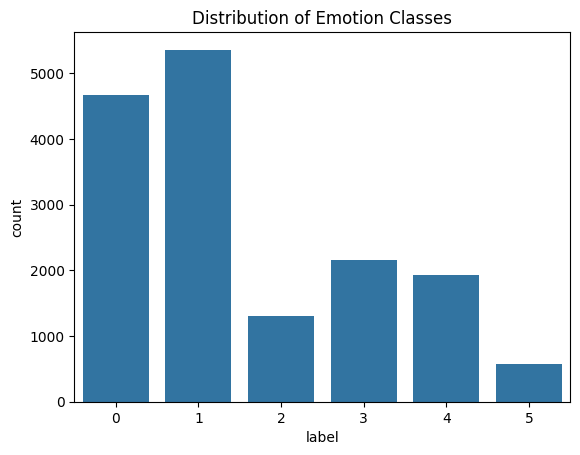

In [5]:
sns.countplot(x='label', data=train_df)
plt.title("Distribution of Emotion Classes")
plt.show()


In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define tokenizer
MAX_NUM_WORDS = 20000
MAX_SEQUENCE_LENGTH = 50

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token='<OOV>')
tokenizer.fit_on_texts(train_df['text'])  # Only on train

# Convert to sequences
X_train = tokenizer.texts_to_sequences(train_df['text'])
X_val = tokenizer.texts_to_sequences(val_df['text'])
X_test = tokenizer.texts_to_sequences(test_df['text'])

# Pad sequences
X_train = pad_sequences(X_train, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
X_val = pad_sequences(X_val, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
X_test = pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

# Labels
y_train = train_df['label'].values
y_val = val_df['label'].values
y_test = test_df['label'].values


In [7]:

model = Sequential()
model.add(Embedding(input_dim=MAX_NUM_WORDS, output_dim=128, input_length=MAX_SEQUENCE_LENGTH))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [8]:

model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss=SparseCategoricalCrossentropy(from_logits=False),
    metrics=[SparseCategoricalAccuracy()]
)


In [9]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=15
)


Epoch 1/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - loss: 1.3956 - sparse_categorical_accuracy: 0.4301 - val_loss: 0.4648 - val_sparse_categorical_accuracy: 0.8450
Epoch 2/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - loss: 0.3182 - sparse_categorical_accuracy: 0.8933 - val_loss: 0.3159 - val_sparse_categorical_accuracy: 0.9085
Epoch 3/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 0.1733 - sparse_categorical_accuracy: 0.9416 - val_loss: 0.2406 - val_sparse_categorical_accuracy: 0.9155
Epoch 4/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 0.1153 - sparse_categorical_accuracy: 0.9628 - val_loss: 0.2759 - val_sparse_categorical_accuracy: 0.9115
Epoch 5/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 0.0868 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.2931 - val_sparse_categorical_accuracy: 0.9190
Epoch 6/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 0.0700 - sparse_categorical_accuracy: 0.9776 - val_loss: 0.3270 - val_sparse_categorical_accuracy: 

In [10]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.4370 - sparse_categorical_accuracy: 0.9139
Test Accuracy: 0.9200


In [11]:
from sklearn.metrics import classification_report

y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)

print(classification_report(y_test, y_pred))


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       581
           1       0.96      0.92      0.94       695
           2       0.78      0.81      0.79       159
           3       0.91      0.93      0.92       275
           4       0.88      0.88      0.88       224
           5       0.72      0.79      0.75        66

    accuracy                           0.92      2000
   macro avg       0.87      0.88      0.88      2000
weighted avg       0.92      0.92      0.92      2000



In [12]:
import pickle

# Save tokenizer
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

# Save model
model.save("emotion_model.h5")


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       581
           1       0.96      0.92      0.94       695
           2       0.78      0.81      0.79       159
           3       0.91      0.93      0.92       275
           4       0.88      0.88      0.88       224
           5       0.72      0.79      0.75        66

    accuracy                           0.92      2000
   macro avg       0.87      0.88      0.88      2000
weighted avg       0.92      0.92      0.92      2000



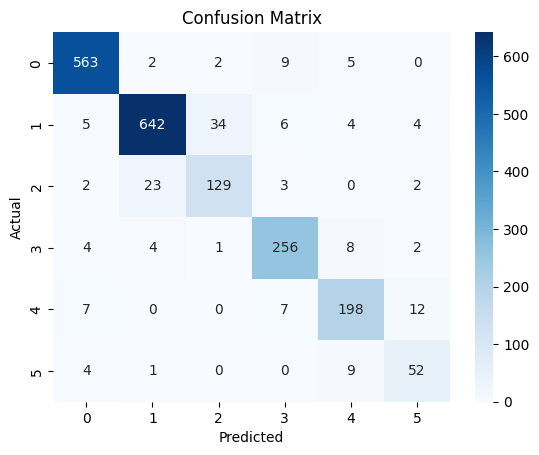

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Predict
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)

# Report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


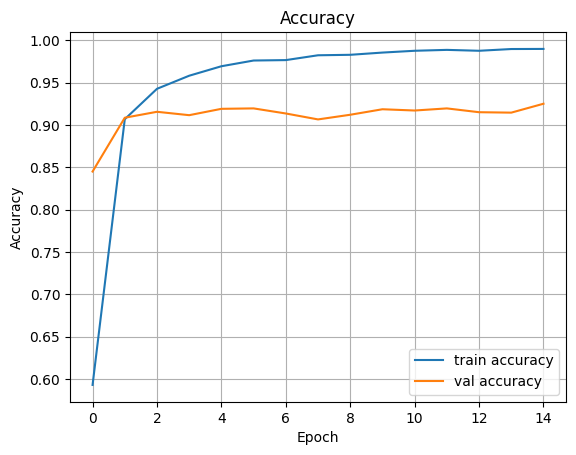

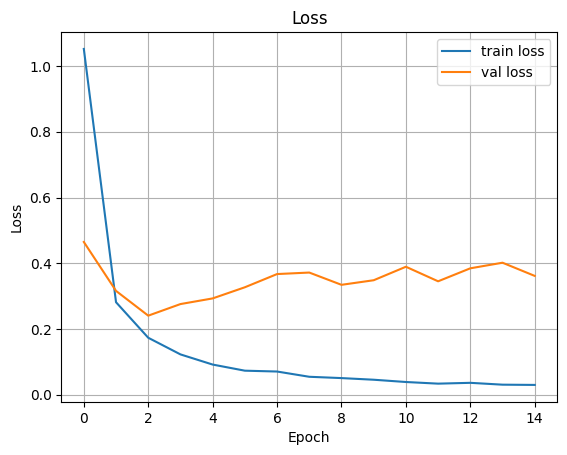

In [14]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['sparse_categorical_accuracy'], label='train accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from transformers import pipeline

# Load the summarizer
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Example tweet
tweet = "i finally arrived home a couple of hours later feeling somewhat exhausted dehydrated and even sun burnt , the heat was very bad and i am very tired please someone help me"

# Generate summary
summary = summarizer(tweet, max_length=30, min_length=5, do_sample=False)
print("Summary:", summary[0]['summary_text'])


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]